In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#!curl -O 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv'

In [3]:
os.system("curl -O https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv")
os.system("mv rows.csv " + os.getenv("PUIDATA"))

0

In [4]:
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + '/' + 'rows.csv')
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [5]:
os.system("curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip")

0

In [6]:
os.system("mv mn_mappluto_16v1.zip " + os.getenv("PUIDATA"))

0

In [7]:
os.system('unzip ' + os.getenv("PUIDATA") + '/' + 'mn_mappluto_16v1.zip')

256

In [8]:
bsize = gp.GeoDataFrame.from_file('MNMapPLUTO.shp')

In [9]:
nrg.columns

Index(['NYC Borough, Block, and Lot (BBL)', 'Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [10]:
bsize.columns

Index(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BBL', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'UnitsRe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb47e7b9b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbb476f9438>]], dtype=object)

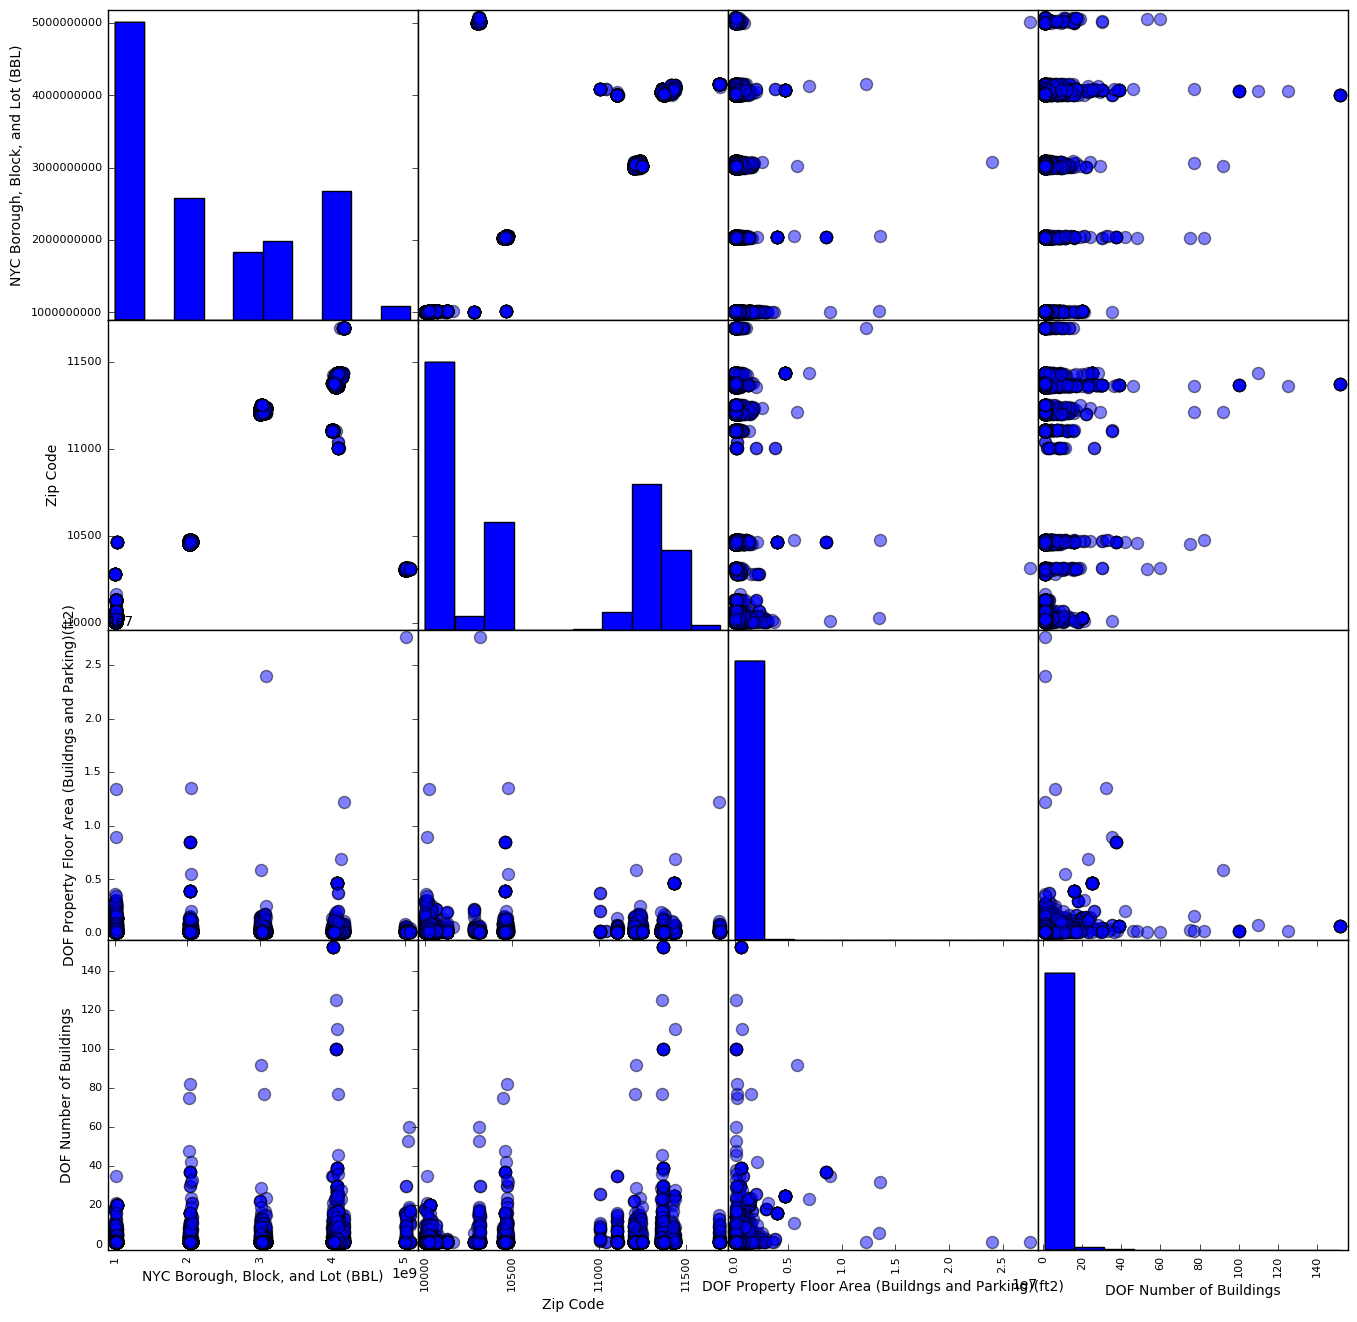

In [11]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

In [12]:
nrg.drop(['Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'], axis = 1, inplace = True)

In [13]:
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
Record Number,,,
12086,1.000410e+09,NaN,918919
14354,4.021460e+09,NaN,NaN
12150,2.027620e+09,NaN,64200
12590,1.006700e+09,NaN,NaN
15591,2.048300e+09,NaN,50000


In [14]:
bsize.drop(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'Version', 'XCoord', 'YCoord',
       'YearAlter1', 'YearAlter2', 'YearBuilt', 'ZMCode', 'ZipCode',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'ZoneMap',
       'geometry'], axis=1, inplace=True)

In [15]:
bsize.head()

,BBL,UnitsRes,UnitsTotal
0,1.015450e+09,16,18
1,1.007238e+09,50,50
2,1.016800e+09,10,10
3,1.013850e+09,29,32
4,1.011970e+09,26,26


In [16]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [17]:
indx = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg['Site EUI(kBtu/ft2)'][~indx] = float('NaN')

invalid entries changed to NaN 15513


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [18]:
indx = (np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft²)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~indx] = float('NaN')

invalid entries changed to NaN 15430


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [19]:
nrg2 = nrg.rename(columns={'NYC Borough, Block, and Lot (BBL)': "BBL"})
nrg2.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
Record Number,,,
12086,1.000410e+09,NaN,918919
14354,4.021460e+09,NaN,NaN
12150,2.027620e+09,NaN,64200
12590,1.006700e+09,NaN,NaN
15591,2.048300e+09,NaN,50000


In [20]:
bblnrgdata = pd.merge(nrg2, bsize)
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal
0,1.006700e+09,NaN,NaN,0,1
1,1.004370e+09,NaN,NaN,0,4
2,1.013110e+09,125.4,330000,0,56
3,1.009220e+09,NaN,NaN,148,148
4,1.007400e+09,NaN,68329,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb47553da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbb47c1b278>]], dtype=object)

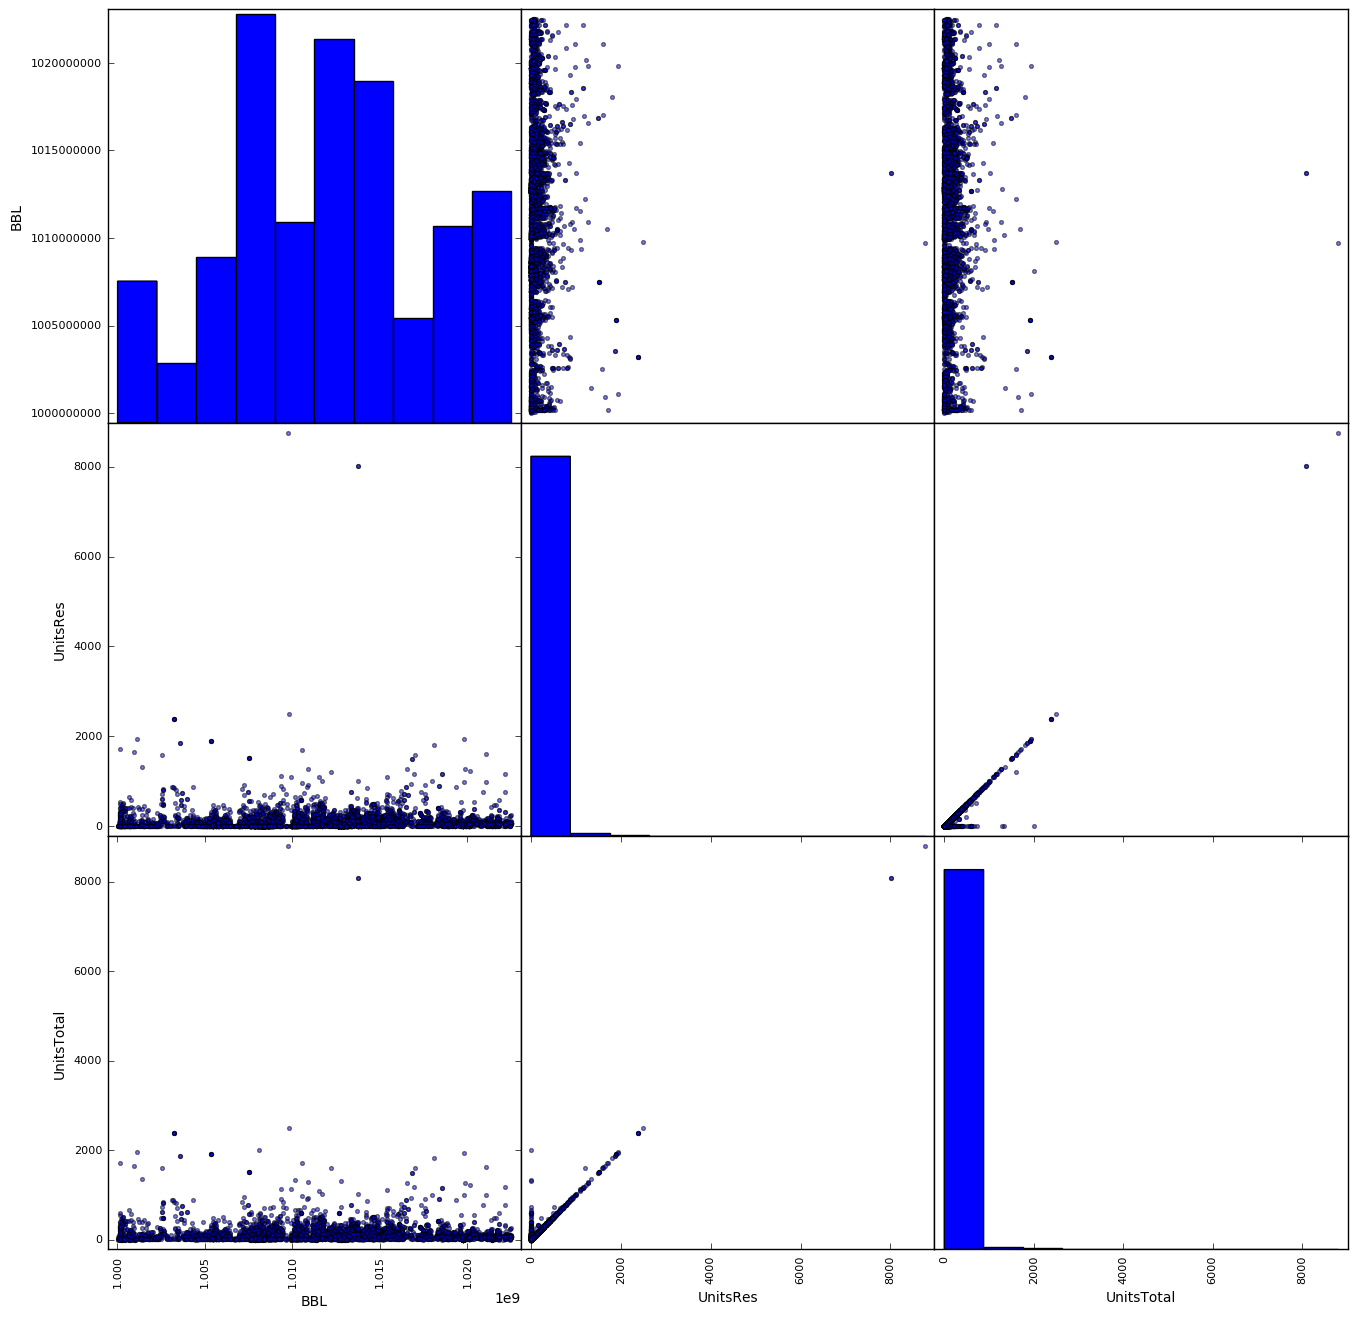

In [21]:
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

In [22]:
bblnrgdata['Value'] = bblnrgdata['Site EUI(kBtu/ft2)'].astype(float) * bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
bblnrgdata.astype(float)

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal,Value
0,1.006700e+09,NaN,NaN,0.0,1.0,NaN
1,1.004370e+09,NaN,NaN,0.0,4.0,NaN
2,1.013110e+09,125.4,330000.0,0.0,56.0,4.138200e+07
3,1.009220e+09,NaN,NaN,148.0,148.0,NaN
4,1.007400e+09,NaN,68329.0,0.0,1.0,NaN
5,1.012770e+09,NaN,66546.0,0.0,16.0,NaN
6,1.008830e+09,NaN,58456.0,2.0,3.0,NaN
7,1.002830e+09,NaN,NaN,0.0,1.0,NaN
8,1.008210e+09,NaN,73000.0,0.0,13.0,NaN
9,1.008240e+09,NaN,74027.0,0.0,11.0,NaN


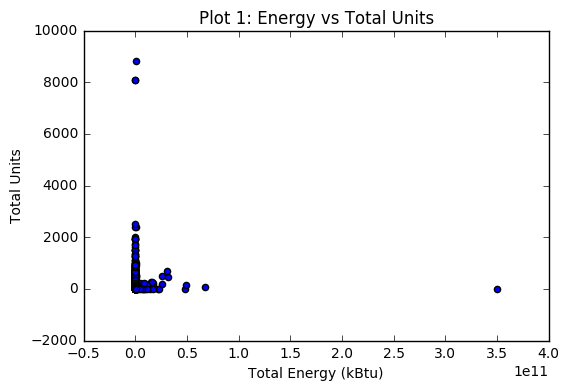

In [23]:
bblnrgdata.plot(x = 'Value', y = 'UnitsTotal', kind = 'scatter')
plt.title('Plot 1: Energy vs Total Units')
#plt.text(1910, -100000, 'Relationship between year of birth and CitiBike trip duration.', fontsize = 12)
plt.xlabel('Total Energy (kBtu)')
plt.ylabel('Total Units')

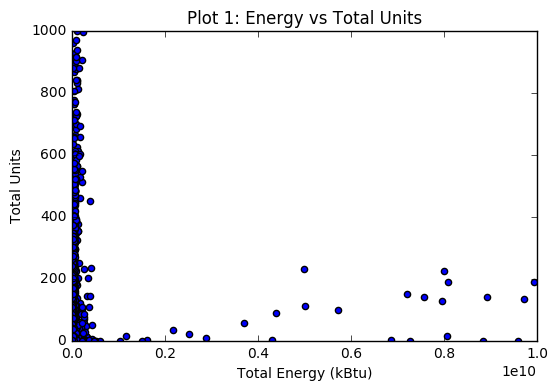

In [24]:
bblnrgdata.plot(x = 'Value', y = 'UnitsTotal', kind = 'scatter')
plt.title('Plot 1: Energy vs Total Units')
#plt.text(1910, -100000, 'Relationship between year of birth and CitiBike trip duration.', fontsize = 12)
plt.xlim(1000,1e10)
plt.ylim(1,1000)
plt.xlabel('Total Energy (kBtu)')
plt.ylabel('Total Units')

In [25]:
bblnrgdata_cut = bblnrgdata[bblnrgdata['Value']>1000]
bblnrgdata_cut = bblnrgdata[bblnrgdata['UnitsTotal']<1000]
bblnrgdata_cut = bblnrgdata[bblnrgdata['UnitsTotal']>2]

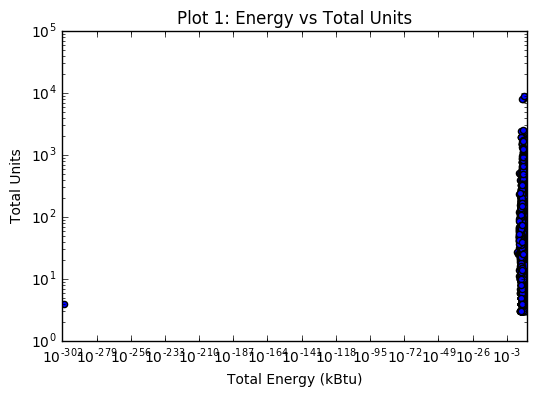

In [27]:
bblnrgdata_cut.plot(x = 'Value', y = 'UnitsTotal', kind = 'scatter', loglog = True)
plt.title('Plot 1: Energy vs Total Units')
#plt.xlim(10,1000)
#plt.ylim(10000,100000000000)
plt.xlabel('Total Energy (kBtu)')
plt.ylabel('Total Units')

In [28]:
bblnrgdata_cut = bblnrgdata[bblnrgdata['Value']>0]
bblnrgdata_cut2 = bblnrgdata_cut[bblnrgdata['UnitsTotal']<1000]
bblnrgdata_cut3 = bblnrgdata_cut2[bblnrgdata['UnitsTotal']>0]
bblnrgdata_cut3

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal,Value
2,1.013110e+09,125.4,330000,0,56,4.138200e+07
10,1.010140e+09,154.9,841709,0,2,1.303807e+08
15,1.007660e+09,122.3,59468,0,8,7.272936e+06
16,1.008150e+09,117,364000,0,24,4.258800e+07
18,1.005050e+09,82.1,235370,0,24,1.932388e+07
19,1.021420e+09,137.69999999999999,64806,54,62,8.923786e+06
20,1.021750e+09,103.2,62839,75,85,6.484985e+06
21,1.003360e+09,74,98000,128,128,7.252000e+06
22,1.008070e+09,130,204417,0,10,2.657421e+07
23,1.008580e+09,138.30000000000001,60110,56,61,8.313213e+06


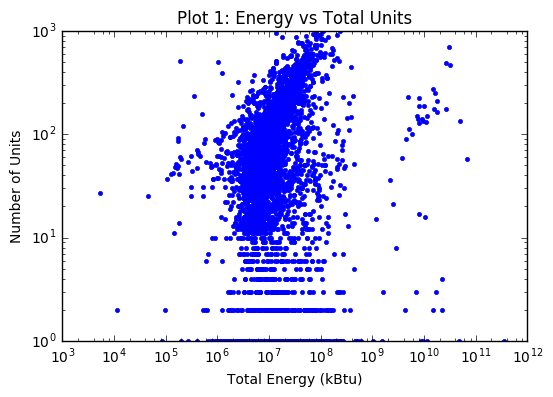

In [29]:
plt.loglog(bblnrgdata_cut3['Value'], bblnrgdata_cut3['UnitsTotal'], basex = 10, basey = 10, linestyle='None', 
           marker='.')
plt.title('Plot 1: Energy vs Total Units')
plt.xlabel('Total Energy (kBtu)')
plt.ylabel('Number of Units')

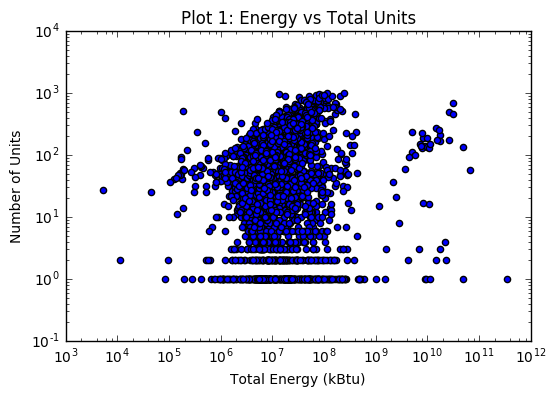

In [31]:
bblnrgdata_cut3.plot(x = 'Value', y = 'UnitsTotal', kind = 'scatter', loglog = True)
plt.title('Plot 1: Energy vs Total Units')
#plt.xlim(10,1000)
#plt.ylim(10000,100000000000)
plt.xlabel('Total Energy (kBtu)')
plt.ylabel('Number of Units')